In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotting import plot_decision_regions

In [2]:
# Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute
# model error
# key ingredient is to have an objective function, which is often the cost function that we want to minimize
# Adaline defines J to learn the weights as the Sum of Squared Erros between the calculated outcome and the true class label
# compared to the unit step function the linear activation function can be differentiable
# it is convex so we can use gradient descent to find the weights that minimize our cost function
# difference between batch gradient descent and stochastic gradient descent is:
# instead of updating the weights based on the sum of errors over all x's
# we update the weights incrementally for each training sample
# we shuffle the data based on random state seed generation
class AdalineSGD(object):

    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):
        # learning rate
        self.eta = eta
        # number of learning iterations
        self.n_iter = n_iter
        # random state seed
        self.random_state = random_state
        # should shuffle data
        self.shuffle = shuffle
        
        self.w_initialized = False
    
    # for each iteration shuffle the data and go through every training example
    # calculate cost for each training example and use an average as a measure for the iteration
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    # uses permutation to generate sequence of unique numbers from 0 to y=100 
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    # initialize weights values as non zeros
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    # calculate the cost and update the weights
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
            
    def net_input(self, X):
        # Calculates wT*x and adds the bias value, w0
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        # compute linear activation
        return X
    
    def predict(self, X):
        # Ternary operation return(self.net_input(X) >= 0) ? 1 : -1
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

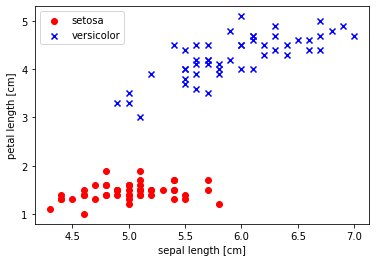

In [3]:
# load data into a pandas dataframe
# data is sorted
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# load first 100 rows and extract the class labesl
# -1 Iris-setosa
# 1 Iris-versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal and petal length X[0] = [5.1 1.4] ex.
X = df.iloc[0:100, [0, 2]].values

# plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [4]:
# normalization with mean 0 and standard deviation of 1
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

(243, 312)


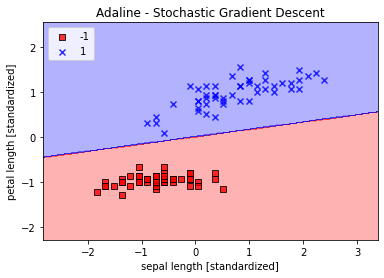

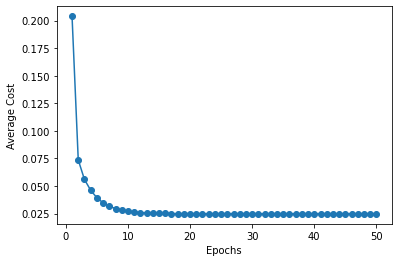

In [12]:
ada = AdalineSGD(n_iter=50, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()